# Import Libraries

In [273]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read Data

In [274]:
df = pd.read_csv("sleep.csv")
print(df.shape)
df.iloc[14:20]

(374, 13)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
14,15,Male,29,Doctor,6.0,6,30,8,Normal,120/80,70,8000,NaN
15,16,Male,29,Doctor,6.0,6,30,8,Normal,120/80,70,8000,NaN
16,17,Female,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Sleep Apnea
17,18,Male,29,Doctor,6.0,6,30,8,Normal,120/80,70,8000,Sleep Apnea
18,19,Female,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Insomnia
19,20,Male,30,Doctor,7.6,7,75,6,Normal,120/80,70,8000,NaN


# Data Cleaning and Visualization

In [275]:
#convert people with sleep disorder as 1 and the other as 0 to see difference between normal people and patients
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')
df['Sleep Disorder'] = df['Sleep Disorder'].apply(lambda x: 0 if x == 'None' else 1)
df['Sleep Disorder']

0      0
1      0
2      0
3      1
4      1
      ..
369    1
370    1
371    1
372    1
373    1
Name: Sleep Disorder, Length: 374, dtype: int64

In [276]:
#normal and normal weight are same thing, so replace normal weight to normal 
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

In [277]:
df.iloc[14:20]

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
14,15,Male,29,Doctor,6.0,6,30,8,Normal,120/80,70,8000,0
15,16,Male,29,Doctor,6.0,6,30,8,Normal,120/80,70,8000,0
16,17,Female,29,Nurse,6.5,5,40,7,Normal,132/87,80,4000,1
17,18,Male,29,Doctor,6.0,6,30,8,Normal,120/80,70,8000,1
18,19,Female,29,Nurse,6.5,5,40,7,Normal,132/87,80,4000,1
19,20,Male,30,Doctor,7.6,7,75,6,Normal,120/80,70,8000,0


# Visualization

<Axes: xlabel='Sleep Duration', ylabel='Count'>

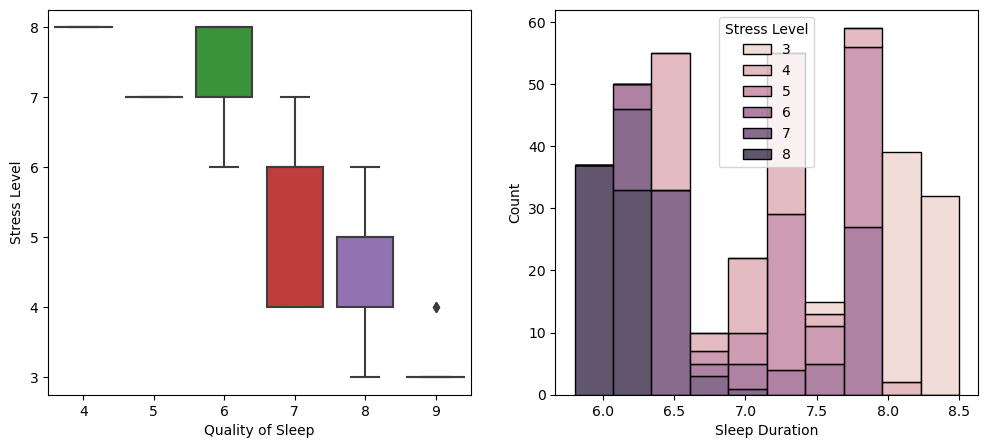

In [404]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) 
sns.boxplot(data=df, x='Quality of Sleep', y='Stress Level')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Sleep Duration', hue='Stress Level', multiple='stack')

/Users/selina/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


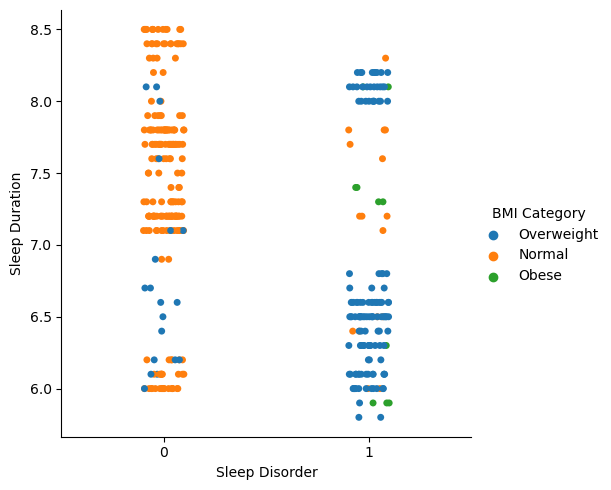

In [454]:
sns.catplot(data=df, hue='BMI Category',y='Sleep Duration', x='Sleep Disorder')

<Axes: xlabel='Gender', ylabel='Stress Level'>

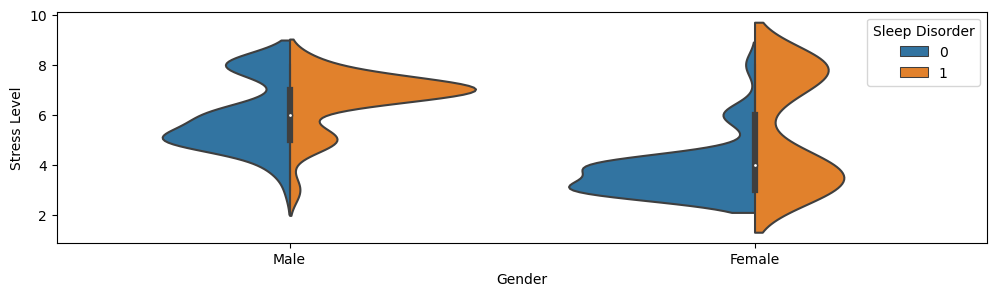

In [456]:
plt.figure(figsize=(12, 3))
sns.violinplot(data=df, x='Gender', y='Stress Level', 
               hue='Sleep Disorder', split=True)

In [281]:
df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder               int64
dtype: object

In [294]:
# get only numerical columns
df2 = df.drop(['Person ID','Gender', 'Occupation', 'BMI Category', 'Blood Pressure'], axis=1)

In [295]:
corr = df2.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder
Age,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973,0.432007
Sleep Duration,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533,-0.338622
Quality of Sleep,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791,-0.310984
Physical Activity Level,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723,0.069787
Stress Level,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829,0.181685
Heart Rate,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309,0.330254
Daily Steps,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000,-0.026575
Sleep Disorder,0.432007,-0.338622,-0.310984,0.069787,0.181685,0.330254,-0.026575,1.000000


In [298]:
df3 = df.drop(['Person ID','Gender', 'Occupation', 'Blood Pressure'], axis=1)
# change BMI Category to numerical values --> 1 = normal, 2 = overweight, 3 = obese

df3 = df3.replace('Normal', 1)
df3 = df3.replace('Overweight', 2)
df3 = df3.replace('Obese', 3)

df3

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,27,6.1,6,42,6,2,77,4200,0
1,28,6.2,6,60,8,1,75,10000,0
2,28,6.2,6,60,8,1,75,10000,0
3,28,5.9,4,30,8,3,85,3000,1
4,28,5.9,4,30,8,3,85,3000,1
...,...,...,...,...,...,...,...,...,...
369,59,8.1,9,75,3,2,68,7000,1
370,59,8.0,9,75,3,2,68,7000,1
371,59,8.1,9,75,3,2,68,7000,1
372,59,8.1,9,75,3,2,68,7000,1


# Train Models

In [299]:
from sklearn.model_selection import train_test_split

X = df3.drop(columns=['Sleep Disorder'])
y = df3['Sleep Disorder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [300]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 1) 
classifier.fit(X_train, y_train)

prediction = classifier.predict(X_test)
correct = np.where(prediction == y_test, 1, 0).sum()
print("Number correct:",correct)
accuracy = correct/len(y_test)
print("Accuracy:", accuracy)

Number correct: 128
Accuracy: 0.8533333333333334


Text(0, 0.5, 'Score')

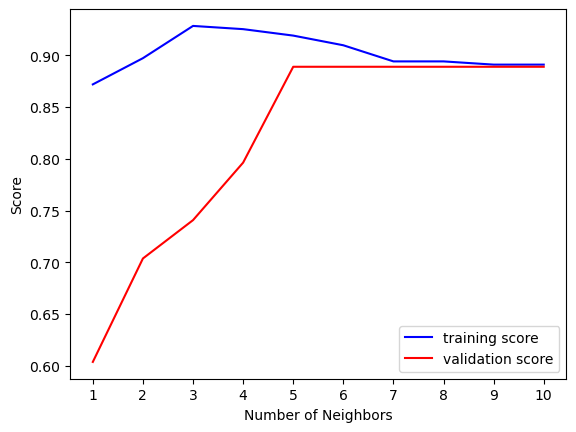

In [301]:
from sklearn.model_selection import validation_curve
neighbors = np.arange(1,11)
train_score, val_score = validation_curve(KNeighborsClassifier(),X,y,param_name='n_neighbors',param_range = neighbors, cv = 7)

plt.plot(neighbors, np.median(train_score,1), color='blue', label='training score')
plt.plot(neighbors, np.median(val_score,1), color='red', label='validation score')
plt.legend(loc='best')
plt.xticks(neighbors)
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')

In [302]:
classifier = KNeighborsClassifier(n_neighbors = 5) 
classifier.fit(X_train, y_train)

prediction = classifier.predict(X_test)
correct = np.where(prediction == y_test, 1, 0).sum()
print("Number correct:",correct)
accuracy = correct/len(y_test)
print("Accuracy:", accuracy)

Number correct: 133
Accuracy: 0.8866666666666667


In [303]:
# Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB
gaussian_model = GaussianNB()
gaussian_model.fit(X_train, y_train)
gaussian_pred = gaussian_model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, gaussian_pred)

0.9

In [291]:
# Random Forest
# SOURCE: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

from sklearn.ensemble import RandomForestClassifier
randomForest_model = RandomForestClassifier()
randomForest_model.fit(X_train, y_train)
randomForest_pred = randomForest_model.predict(X_test)
accuracy_score(y_test, randomForest_pred)

0.9133333333333333